In [224]:
#Import required modules
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#import file
titanic_data = pd.read_csv('data/titanic.csv')
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,PaCh,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [225]:
print(f'Number of passangers: {len(titanic_data.index)}')

Number of passangers: 887


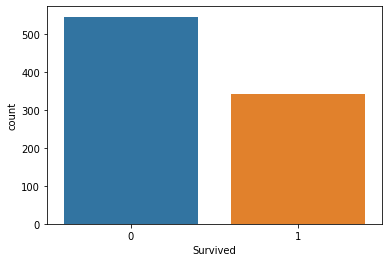

In [226]:
# Analyse data
sns.countplot(x='Survived', data=titanic_data)

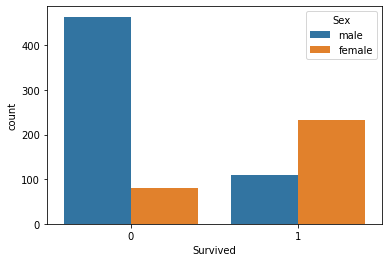

In [227]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

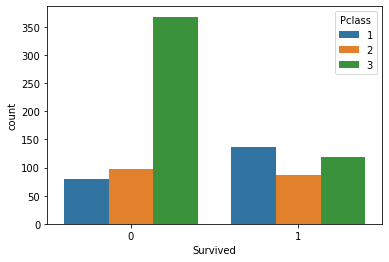

In [228]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

(array([ 63.,  51., 242., 211., 142.,  88.,  49.,  28.,  11.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

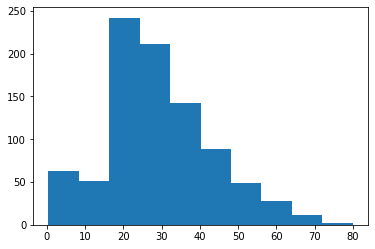

In [229]:
#titanic_data['Age'].plot.hist()
plt.hist(titanic_data['Age'])

In [231]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Name      887 non-null    object 
 3   Sex       887 non-null    object 
 4   Age       887 non-null    float64
 5   SibSp     887 non-null    int64  
 6   PaCh      887 non-null    int64  
 7   Fare      887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


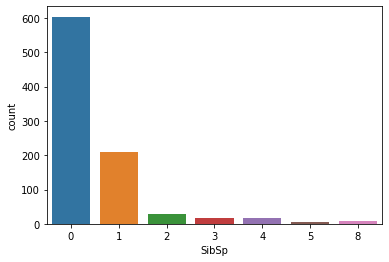

In [232]:
sns.countplot(x='SibSp', data=titanic_data)

In [233]:
# Data Wrangling
titanic_data.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,PaCh,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
882,False,False,False,False,False,False,False,False
883,False,False,False,False,False,False,False,False
884,False,False,False,False,False,False,False,False
885,False,False,False,False,False,False,False,False


In [235]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
PaCh        0
Fare        0
dtype: int64

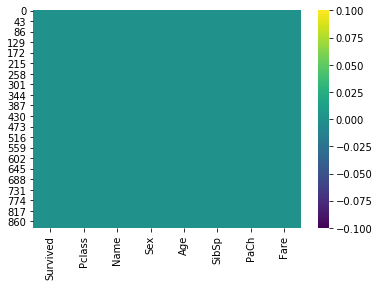

In [236]:
sns.heatmap(titanic_data.isnull(), cmap='viridis') #yticklabels==False

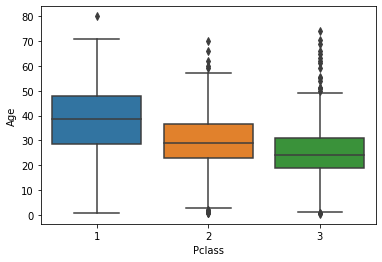

In [240]:
sns.boxplot(x='Pclass', y='Age', data=titanic_data)

In [241]:
titanic_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,PaCh,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [245]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [247]:
#embark = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
#embark.head(5)

In [249]:
p_class = pd.get_dummies(titanic_data['Pclass'], drop_first=True)
p_class.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [250]:
titanic_data = pd.concat([titanic_data, sex, p_class], axis=1)
titanic_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,PaCh,Fare,male,2,3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0,1


In [251]:
titanic_data.drop(['Sex', 'Name'], axis=1, inplace=True)

In [252]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,PaCh,Fare,male,2,3
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0
4,0,3,35.0,0,0,8.0500,1,0,1


In [253]:
titanic_data.drop('Pclass', axis=1, inplace=True)

In [254]:
#train Data
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [262]:
#import the sklearn module
from sklearn.model_selection import train_test_split

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [266]:
from sklearn.linear_model import LogisticRegression

In [267]:
log_model = LogisticRegression()

In [268]:
log_model.fit(X_train, y_train)

C:\Users\BENJAMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [271]:
predictions = log_model.predict(X_test)

In [272]:
from sklearn.metrics import classification_report

In [273]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.81      0.81       162\n           1       0.70      0.70      0.70       105\n\n    accuracy                           0.77       267\n   macro avg       0.76      0.76      0.76       267\nweighted avg       0.77      0.77      0.77       267\n'

In [274]:
from sklearn.metrics import confusion_matrix

In [275]:
confusion_matrix(y_test, predictions)

array([[131,  31],
       [ 31,  74]], dtype=int64)

In [277]:
from sklearn.metrics import accuracy_score

In [279]:
accuracy_score(y_test, predictions)*100

76.77902621722846